Class Names: ['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


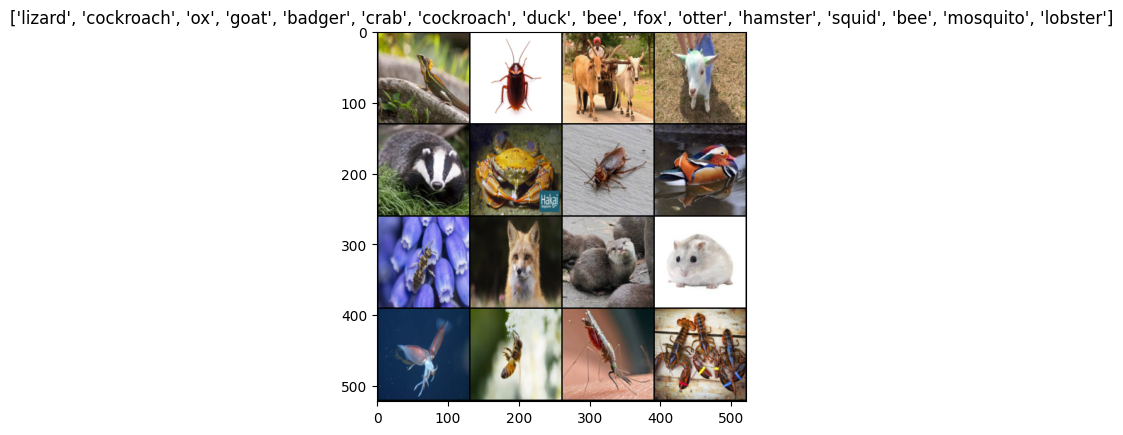

Image Dimensions: torch.Size([16, 3, 128, 128])


In [22]:
import torch
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resizing all images to 128x128
    transforms.ToTensor(),          # Convert images to tensors
])

# Load the dataset
dataset = datasets.ImageFolder(root='animals', transform=transform)

# Display class names
class_names = dataset.classes
print("Class Names:", class_names)

# Create a DataLoader to iterate over the dataset
data_loader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

# Function to show images in a grid
def show_images(images, labels):
    images = make_grid(images, nrow=4)
    npimg = images.numpy().transpose((1, 2, 0))
    plt.imshow(npimg)
    plt.title([class_names[label] for label in labels])
    plt.show()

# Get a batch of images and labels
images, labels = next(iter(data_loader))

# Show images and labels
show_images(images, labels)

# Print the dimensions of the images
print("Image Dimensions:", images.shape)  # Should be (Batch Size, Channels, Height, Width)


In [23]:
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 32 * 32)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
num_classes = len(class_names)
model = SimpleCNN(num_classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 8
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    # Use TQDM for progress tracking
    for images, labels in tqdm(data_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(data_loader)
    accuracy = 100 * correct / total

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

print("Training Complete!")

torch.save(model.state_dict(), 'classifier_cnn_model.pt')

Epoch 1/8: 100%|██████████| 338/338 [01:37<00:00,  3.47it/s]


Epoch [1/8], Loss: 4.3623, Accuracy: 3.65%


Epoch 2/8: 100%|██████████| 338/338 [00:59<00:00,  5.71it/s]


Epoch [2/8], Loss: 3.5926, Accuracy: 16.78%


Epoch 3/8: 100%|██████████| 338/338 [00:59<00:00,  5.71it/s]


Epoch [3/8], Loss: 2.1028, Accuracy: 48.59%


Epoch 4/8: 100%|██████████| 338/338 [00:58<00:00,  5.74it/s]


Epoch [4/8], Loss: 0.6231, Accuracy: 84.52%


Epoch 5/8: 100%|██████████| 338/338 [00:58<00:00,  5.79it/s]


Epoch [5/8], Loss: 0.1704, Accuracy: 96.11%


Epoch 6/8: 100%|██████████| 338/338 [00:59<00:00,  5.66it/s]


Epoch [6/8], Loss: 0.0992, Accuracy: 97.94%


Epoch 7/8: 100%|██████████| 338/338 [00:58<00:00,  5.76it/s]


Epoch [7/8], Loss: 0.0479, Accuracy: 98.96%


Epoch 8/8: 100%|██████████| 338/338 [00:59<00:00,  5.66it/s]


Epoch [8/8], Loss: 0.0464, Accuracy: 99.04%
Training Complete!


Classification Report:
                precision    recall  f1-score   support

      antelope       1.00      1.00      1.00        60
        badger       1.00      1.00      1.00        60
           bat       1.00      1.00      1.00        60
          bear       1.00      1.00      1.00        60
           bee       1.00      1.00      1.00        60
        beetle       1.00      1.00      1.00        60
         bison       1.00      1.00      1.00        60
          boar       1.00      1.00      1.00        60
     butterfly       1.00      1.00      1.00        60
           cat       1.00      1.00      1.00        60
   caterpillar       1.00      1.00      1.00        60
    chimpanzee       1.00      1.00      1.00        60
     cockroach       1.00      1.00      1.00        60
           cow       1.00      1.00      1.00        60
        coyote       1.00      1.00      1.00        60
          crab       1.00      1.00      1.00        60
          crow       1.0

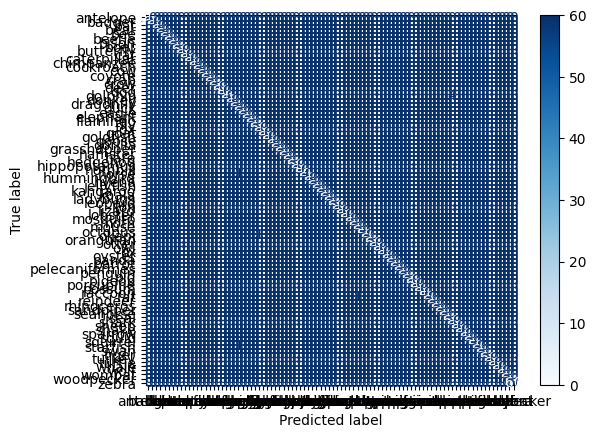

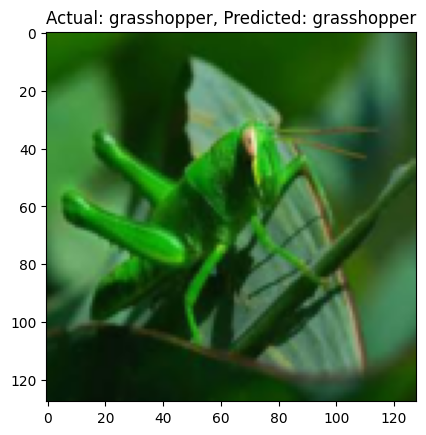

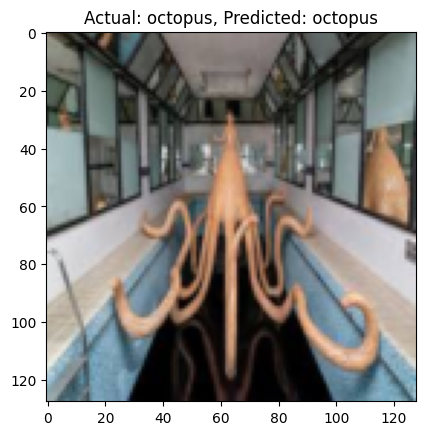

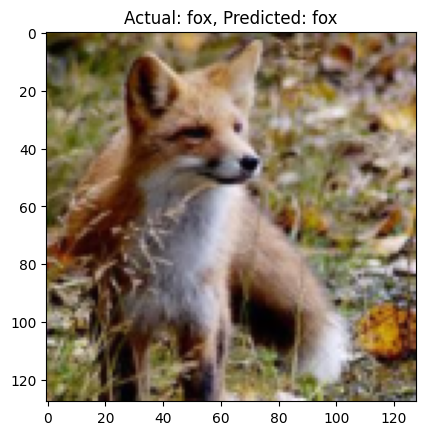

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import random

# Function to test the model and generate the required plots
def test_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    # Classification report
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Show actual class and predicted class for 3 random images
    indices = random.sample(range(len(dataset)), 3)
    for i in indices:
        image, label = dataset[i]
        image = image.unsqueeze(0).to(device)
        output = model(image)
        _, predicted = torch.max(output.data, 1)
        predicted_label = predicted.item()
        plt.imshow(image.cpu().squeeze().permute(1, 2, 0))
        plt.title(f"Actual: {class_names[label]}, Predicted: {class_names[predicted_label]}")
        plt.show()

# Test the model
test_model(model, data_loader)


In [25]:
import torch
import torch.nn.functional as F
import numpy as np
from scipy.optimize import differential_evolution
from tqdm import tqdm

def one_pixel_attack(image, label, model, bounds, maxiter=20):
    def perturb_pixel(pixel):
        perturbed_image = image.clone()
        perturbed_image[0, :, int(pixel[0]), int(pixel[1])] = torch.tensor(pixel[2:], device=image.device)
        with torch.no_grad():
            output = model(perturbed_image)
        loss = -F.cross_entropy(output, torch.tensor([label], device=image.device))
        return loss.item()
    
    result = differential_evolution(perturb_pixel, bounds=bounds, maxiter=maxiter, popsize=10)
    return result.x

bounds = [(0, 127), (0, 127), (0, 1), (0, 1), (0, 1)]  

model.eval()

dog_breeds_attacked = []
patch_data = []

batch_size = 32
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False)

for batch_idx, (images, labels) in tqdm(enumerate(dataloader), total=len(dataloader), desc="Attacking images"):
    images = images.to(device)
    labels = labels.to(device)
    
    for i in range(images.size(0)):
        image = images[i].unsqueeze(0)
        label = labels[i]
        
        pixel = one_pixel_attack(image, label, model, bounds)
        attacked_image = image.clone()
        attacked_image[0, :, int(pixel[0]), int(pixel[1])] = torch.tensor(pixel[2:], device=image.device)
        
        dog_breeds_attacked.append((attacked_image.cpu().squeeze(), label.item()))
        
        patch_size = 16
        for row in range(0, 128, patch_size):
            for col in range(0, 128, patch_size):
                patch = attacked_image[:, :, row:row+patch_size, col:col+patch_size]
                patch_id = f"[{batch_idx * batch_size + i}][{row//patch_size * 8 + col//patch_size}]"
                attacked_or_not = 1 if (row <= pixel[0] < row + patch_size and col <= pixel[1] < col + patch_size) else 0
                patch_data.append((patch.cpu().squeeze(), patch_id, attacked_or_not))

    if (batch_idx + 1) % 10 == 0:
        torch.save(dog_breeds_attacked, f'animals-attacked-{batch_idx+1}.pt')
        torch.save(patch_data, f'Patch-data-{batch_idx+1}.pt')
        dog_breeds_attacked = []
        patch_data = []

# Save any remaining data
if dog_breeds_attacked:
    torch.save(dog_breeds_attacked, f'animals-attacked.pt')
if patch_data:
    torch.save(patch_data, f'Patch-data.pt')

Attacking images:   0%|          | 0/169 [00:00<?, ?it/s]

Attacking images: 100%|██████████| 169/169 [2:21:26<00:00, 50.22s/it] 


Testing attacked dataset: 100%|██████████| 280/280 [00:00<00:00, 671.59it/s]


Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

          85       1.00      1.00      1.00        40
          86       1.00      1.00      1.00        60
          87       1.00      1.00      1.00        60
          88       1.00      1.00      1.00        60
          89       1.00      1.00      1.00        60

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



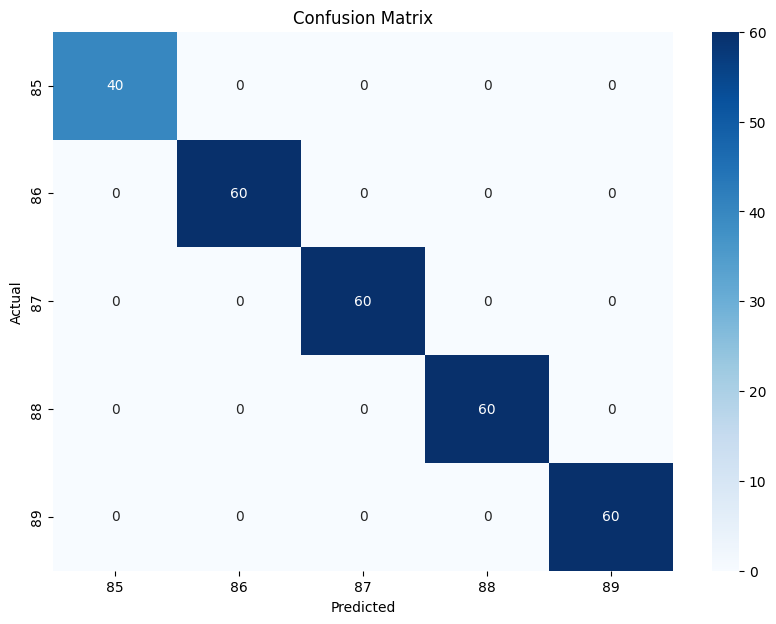

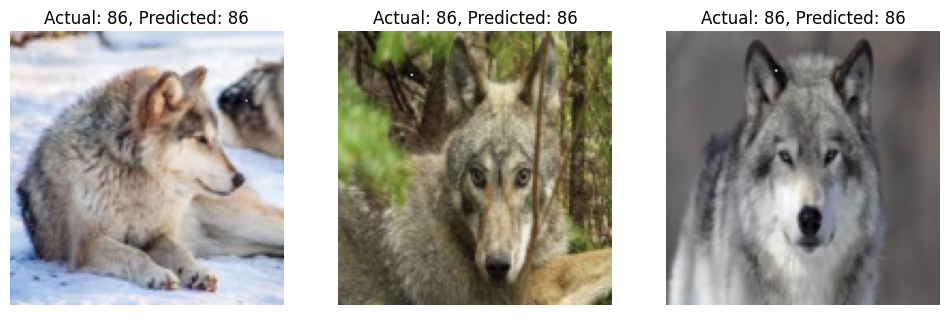

In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the attacked dataset
dog_breeds_attacked = torch.load('animals-attacked.pt')

# Set model to evaluation mode
model.eval()

# Initialize variables for accuracy calculation
all_preds = []
all_labels = []
loss_fn = torch.nn.CrossEntropyLoss()

# Test the attacked dataset
with torch.no_grad():
    for attacked_image, label in tqdm(dog_breeds_attacked, desc="Testing attacked dataset"):
        attacked_image = attacked_image.unsqueeze(0).to(device)  # Add batch dimension
        label = torch.tensor(label).to(device)  # Convert label to tensor
        
        output = model(attacked_image)
        loss = loss_fn(output, label.unsqueeze(0))  # Compute loss
        
        _, predicted = torch.max(output, 1)  # Get predicted class
        
        all_preds.append(predicted.item())
        all_labels.append(label.item())

# Calculate accuracy
accuracy = np.sum(np.array(all_preds) == np.array(all_labels)) / len(all_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds))

# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Show actual and predicted classes for 3 random images
random_indices = np.random.choice(len(dog_breeds_attacked), size=3, replace=False)

plt.figure(figsize=(12, 4))
for i, idx in enumerate(random_indices):
    attacked_image, label = dog_breeds_attacked[idx]
    attacked_image = attacked_image.permute(1, 2, 0)  # Rearrange for plotting
    attacked_image = attacked_image.numpy()

    # Get prediction
    predicted = all_preds[idx]
    
    plt.subplot(1, 3, i + 1)
    plt.imshow(attacked_image)
    plt.title(f'Actual: {label}, Predicted: {predicted}')
    plt.axis('off')

plt.show()


Class Label: 85


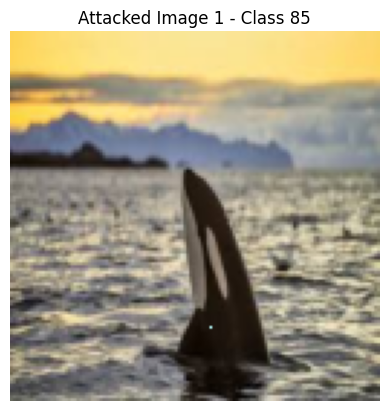

Class Label: 85


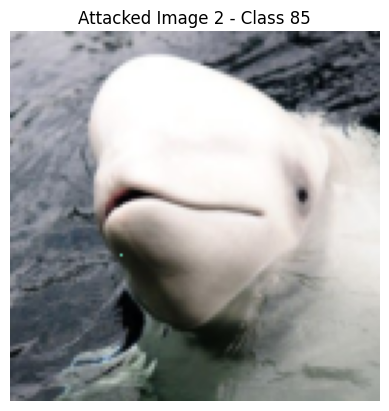

Class Label: 85


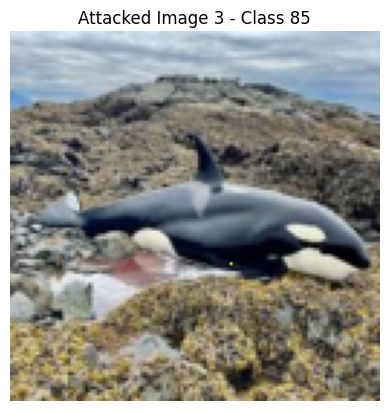

torch.Size([3, 128, 128])

In [27]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Load the attacked dataset
dog_breeds_attacked = torch.load('animals-attacked.pt')

# Function to display an image
def show_image(image_tensor, title=""):
    image = image_tensor.squeeze(0)  # Remove the batch dimension
    image = transforms.ToPILImage()(image)  # Convert tensor to PIL image
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Preview a few images from the attacked dataset
for i in range(3):  # Change the range to see more examples
    attacked_image, label = dog_breeds_attacked[i]
    print(f"Class Label: {label}")
    show_image(attacked_image, title=f"Attacked Image {i+1} - Class {label}")
attacked_image.shape

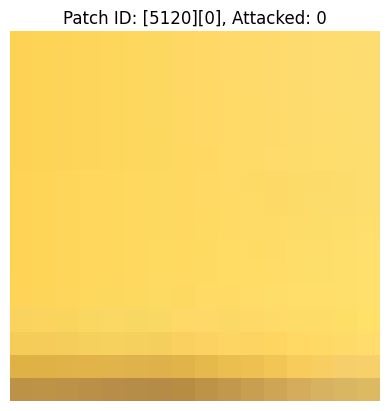

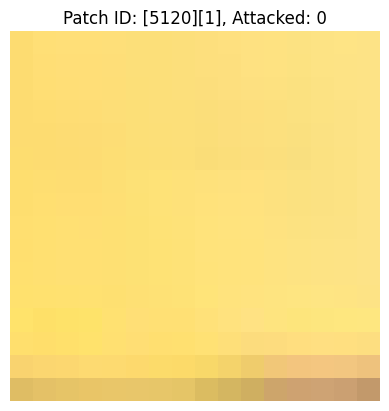

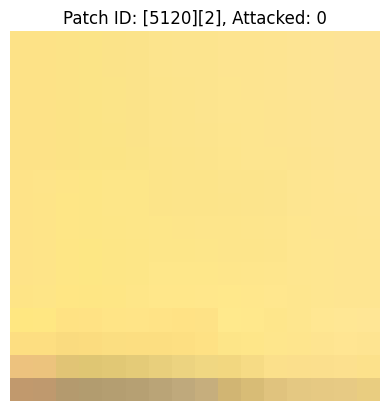

In [28]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Load the patch dataset
patch_data = torch.load('Patch-data.pt')

# Function to display a patch
def show_patch(patch_tensor, patch_id, attacked_or_not):
    patch = patch_tensor.squeeze(0)  # Remove the batch dimension
    patch = transforms.ToPILImage()(patch)  # Convert tensor to PIL image
    plt.imshow(patch)
    title = f"Patch ID: {patch_id}, Attacked: {attacked_or_not}"
    plt.title(title)
    plt.axis('off')
    plt.show()

# Preview a few patches from the patch dataset
for i in range(3):  # Change the range to see more examples
    patch_tensor, patch_id, attacked_or_not = patch_data[i]
    show_patch(patch_tensor, patch_id, attacked_or_not)
patch_tensor, _, _ = patch_data[0]


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import torch.nn.functional as F


# Define the CNN model
class PatchCNN(nn.Module):
    def __init__(self):
        super(PatchCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 4 * 4, 128)  # Assuming 16x16 input patches
        self.fc2 = nn.Linear(128, 2)  # Binary classification

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # No activation here; use softmax in the loss function
        return x

class PatchDataset(Dataset):
    def __init__(self, patch_data):
        self.patches = patch_data

    def __len__(self):
        return len(self.patches)

    def __getitem__(self, idx):
        patch, patch_id, attacked_or_not = self.patches[idx]
        return patch.float(), attacked_or_not  # Return the patch and label

# Load the patch data
patch_data = torch.load('Patch-data.pt')
dataset = PatchDataset(patch_data)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Initialize the model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PatchCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training parameters
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    with tqdm(total=len(data_loader), desc=f'Epoch {epoch + 1}/{num_epochs}') as pbar:
        for patches, labels in data_loader:
            patches, labels = patches.to(device), labels.to(device)

            # Forward pass
            outputs = model(patches)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Calculate running loss and accuracy
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            pbar.set_postfix(loss=running_loss / (pbar.n + 1), accuracy=correct / total)
            pbar.update(1)

    # Print average loss and accuracy for the epoch
    avg_loss = running_loss / len(data_loader)
    accuracy = correct / total
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy * 100:.2f}%')




Epoch 1/10: 100%|██████████| 560/560 [00:03<00:00, 170.06it/s, accuracy=0.984, loss=0.0872]


Epoch [1/10], Loss: 0.0872, Accuracy: 98.44%


Epoch 2/10: 100%|██████████| 560/560 [00:03<00:00, 149.28it/s, accuracy=0.984, loss=0.0686]


Epoch [2/10], Loss: 0.0686, Accuracy: 98.44%


Epoch 3/10: 100%|██████████| 560/560 [00:03<00:00, 164.60it/s, accuracy=0.988, loss=0.0458]


Epoch [3/10], Loss: 0.0458, Accuracy: 98.83%


Epoch 4/10: 100%|██████████| 560/560 [00:03<00:00, 162.51it/s, accuracy=0.994, loss=0.0308]


Epoch [4/10], Loss: 0.0308, Accuracy: 99.39%


Epoch 5/10: 100%|██████████| 560/560 [00:04<00:00, 138.26it/s, accuracy=0.995, loss=0.026] 


Epoch [5/10], Loss: 0.0260, Accuracy: 99.54%


Epoch 6/10: 100%|██████████| 560/560 [00:03<00:00, 170.44it/s, accuracy=0.996, loss=0.0233]


Epoch [6/10], Loss: 0.0233, Accuracy: 99.60%


Epoch 7/10: 100%|██████████| 560/560 [00:03<00:00, 167.06it/s, accuracy=0.996, loss=0.0235]


Epoch [7/10], Loss: 0.0235, Accuracy: 99.57%


Epoch 8/10: 100%|██████████| 560/560 [00:03<00:00, 142.27it/s, accuracy=0.997, loss=0.0196]


Epoch [8/10], Loss: 0.0196, Accuracy: 99.65%


Epoch 9/10: 100%|██████████| 560/560 [00:03<00:00, 161.87it/s, accuracy=0.997, loss=0.0178]


Epoch [9/10], Loss: 0.0178, Accuracy: 99.68%


Epoch 10/10: 100%|██████████| 560/560 [00:03<00:00, 157.06it/s, accuracy=0.997, loss=0.0171]

Epoch [10/10], Loss: 0.0171, Accuracy: 99.70%


In [30]:
torch.save(model.state_dict(), 'patchCNN.pt')

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

# Load the attacked dataset
dog_breeds_attacked = torch.load('animals-attacked.pt')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the trained model for patch prediction
class PatchCNN(nn.Module):
    def __init__(self):
        super(PatchCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 2)  # Binary classification

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model
model = PatchCNN().to(device)
model.load_state_dict(torch.load('patchCNN.pt'))  # Load your trained model weights
model.eval()

# Repair mechanism
def repair_image(image):
    patch_size = 16
    patches = []
    patch_probs = []

    # Divide the image into patches
    for row in range(0, 128, patch_size):
        for col in range(0, 128, patch_size):
            patch = image[:, :, row:row + patch_size, col:col + patch_size]
            patches.append(patch)

    # Process each patch
    with torch.no_grad():
        for patch in tqdm(patches, desc="Processing patches"):
            patch = patch.to(device)
            output = model(patch)  # No need to unsqueeze as patch is already [1, 3, 16, 16]
            prob = F.softmax(output, dim=1)  # Get probabilities
            patch_probs.append(prob[0][1].item())  # Probability of being attacked

    # Find the index of the patch with the highest probability
    attacked_patch_index = patch_probs.index(max(patch_probs))

    # Repair the identified attacked patch
    row = (attacked_patch_index // 8) * patch_size
    col = (attacked_patch_index % 8) * patch_size

    # Collect surrounding patches (with boundary checks)
    surrounding_patches = []
    for i in range(max(0, attacked_patch_index - 1), min(len(patches), attacked_patch_index + 2)):
        if i != attacked_patch_index:
            surrounding_patches.append(patches[i])

    if surrounding_patches:
        # Average neighboring patches to repair
        repaired_patch = torch.mean(torch.stack(surrounding_patches), dim=0)

        # Replace the attacked patch in the original image
        image[:, :, row:row + patch_size, col:col + patch_size] = repaired_patch

    return image

# Main loop to repair images in the attacked dataset
repaired_images = []

for attacked_image, label in tqdm(dog_breeds_attacked, desc="Repairing images"):
    attacked_image = attacked_image.unsqueeze(0).to(device)  # Add batch dimension
    repaired_image = repair_image(attacked_image)
    repaired_images.append((repaired_image.cpu(), label))

# Save or use repaired_images as needed
torch.save(repaired_images, 'repaired_images.pt')


Repairing images: 100%|██████████| 280/280 [00:23<00:00, 11.83it/s]
